In [51]:
import numpy as np
from PIL import Image
import seaborn as sns;
import matplotlib.pyplot as plt
import pandas as pd

from skimage import measure
from skimage import filters
from skimage.filters import threshold_otsu

In [52]:
n = 1000;

In [53]:
#filename      = "../../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20";
#filename = "../MikeData/EGFR-P1-ATTO655_cell_3_MMImages.ome_locs_render"
filename = "../../MikeData/EGFR-P1-ATTO655_cell_2_MMImages.ome_locs_render_al_linked1sigma"

In [54]:
XC = np.loadtxt(filename+".txt");

In [55]:
H_mask_signal = np.loadtxt(filename+"_heatmap_mask_signal.txt");
H_mask_noise  = np.loadtxt(filename+"_heatmap_mask_noise.txt");

In [56]:
H = np.loadtxt(filename+"_heatmap_D.txt");
X = np.loadtxt(filename+"_heatmap_X.txt");
Y = np.loadtxt(filename+"_heatmap_Y.txt");

In [57]:
X_flat = X.flatten()
Y_flat = Y.flatten()
H_noise_flat = (H_mask_noise.T).flatten()
H_signal_flat = (H_mask_signal.T).flatten()

In [58]:
H_mask_noise.shape

(1000, 1000)

In [59]:
if(X.shape != (n,n)):
    raise Exception("Wrong dimension");

In [60]:
XC_u = np.unique(X);
dx = np.mean(XC_u[1:]-XC_u[:-1])
x_min = np.min(XC_u);

YC_u = np.unique(Y);
dy = np.mean(YC_u[1:]-YC_u[:-1])
y_min = np.min(YC_u);

In [61]:
def GetIndex(xc):
    x_index = (np.round((xc[:,0]-x_min)/dx)).astype(int)
    y_index = (np.round((xc[:,1]-y_min)/dy)).astype(int)
    
    x_index = np.minimum(n-1,np.maximum(0,x_index));
    y_index = np.minimum(n-1,np.maximum(0,y_index));    
    
#    print(x_index)
 #   print(y_index)  
    return y_index*n+x_index

In [62]:
def TestIndex(XC):
     index =  GetIndex(XC)
     print((X_flat[index] - XC[:,0]<dx));
     print((Y_flat[index] - XC[:,1]<dy));

In [63]:
mask_noise  = H_noise_flat[GetIndex(XC)];
mask_signal = H_signal_flat[GetIndex(XC)];

In [64]:
XC_signal = XC[mask_signal==True];
XC_noise  = XC[mask_noise==True];

In [65]:
np.savetxt(filename+"_X_signal.txt",XC_signal,fmt="%f");

In [66]:
np.savetxt(filename+"_X_noise.txt",XC_noise,fmt="%f");

In [67]:
H_signal, xedges, yedges = np.histogram2d(XC_signal[:,0],XC_signal[:,1],bins=1000);
H_noise, xedges, yedges = np.histogram2d(XC_noise[:,0],XC_noise[:,1],bins=1000);

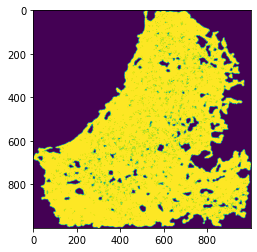

In [68]:
plt.imshow(H_signal>0)
plt.savefig(filename+'_Image_Signal.pdf')

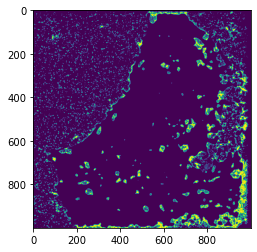

In [69]:
plt.imshow(H_noise>0)
plt.savefig(filename+'_Image_Noise.pdf')

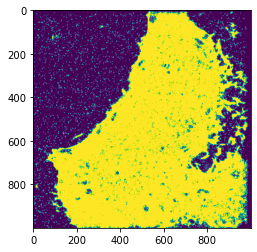

In [70]:
plt.imshow(H>0)
plt.savefig(filename+'_Image_all.pdf')

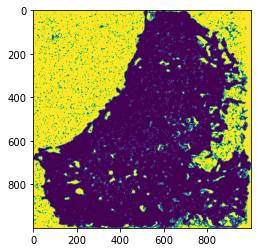

In [71]:
plt.imshow((H_noise==0)*(H_signal==0))
plt.savefig(filename+'_Image_all.pdf')